In [14]:
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score


import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout


from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression

In [9]:
df = pd.read_csv('fjolbyli_all_variables_MEAN.csv', index_col=0)

In [12]:
df.head()

,kaupverd,fasteignamat,byggar,einflm,lod_flm,fullbuid,postnr_101.0,postnr_102.0,postnr_103.0,postnr_104.0,...,fjöldi_kaupsamninga,auglyst_fjolbyli,solutimi,Verðtryggð lán,erlend_lan,Óverðtryggð lán,overdtryggt,verdtryggt,visitala_rvk_%,verdbolga_%
date,,,,,,,,,,,,,,,,,,,,,
2006-04-01,24700.000000,19820.000000,1988.000000,112.300000,1285.000000,1.0,0.000000,0.000000,0.000000,0.000000,...,598.40,2.05,6.21,87.42,7.19,4.07,12.5,4.30,1.2,1.070205
2006-05-01,16480.000000,14469.000000,1961.400000,87.140000,3860.200000,1.0,0.200000,0.000000,0.000000,0.000000,...,617.00,2.05,6.21,87.31,7.36,4.01,13.0,4.60,-0.2,1.482423
2006-06-01,21091.755932,16509.128814,1974.264407,98.495932,3491.331186,1.0,0.084746,0.000000,0.006780,0.061017,...,472.74,2.05,6.21,87.20,7.53,3.95,14.0,4.60,0.6,1.001669
2006-07-01,20611.407725,16359.206009,1975.274678,96.203004,3657.852361,1.0,0.124464,0.004292,0.008584,0.038627,...,436.96,2.05,6.21,87.09,7.70,3.89,14.0,4.60,-1.7,0.413223
2006-08-01,20903.258197,16767.118852,1973.262295,96.467213,3343.376639,1.0,0.098361,0.000000,0.004098,0.045082,...,406.92,2.05,6.21,86.98,7.87,3.83,14.5,4.85,2.4,0.288066


In [18]:
X = df.drop(['verd_m2','kaupverd'], axis=1)
y = df['verd_m2']

In [19]:
scaler = preprocessing.MinMaxScaler()
Xs = scaler.fit_transform(X)
Xs = pd.DataFrame(Xs, columns=X.columns)

In [20]:
X_train = Xs[:int(Xs.shape[0]*0.8)]
X_test = Xs[int(Xs.shape[0]*0.8):]
y_train = y[:int(X.shape[0]*0.8)]
y_test = y[int(X.shape[0]*0.8):]

In [21]:
regr = LinearRegression()
regr.fit(X_train,y_train)
regr.score(X_train,y_train)

0.9771164421558377

In [22]:
y_hat = regr.predict(X_test)

In [29]:
y_hat

array([4.87250000e+02, 5.06000000e+02, 5.04750000e+02, 4.93250000e+02,
       4.93750000e+02, 5.00750000e+02, 4.87000000e+02, 4.96750000e+02,
       4.99000000e+02, 4.86750000e+02, 5.11750000e+02, 5.09250000e+02,
       4.99500000e+02, 5.02000000e+02, 4.91250000e+02, 5.07000000e+02,
       5.21000000e+02, 5.13500000e+02, 5.09750000e+02, 5.13000000e+02,
       5.20750000e+02, 5.18000000e+02, 5.21250000e+02, 5.36500000e+02,
       5.36500000e+02, 5.34750000e+02, 5.38000000e+02, 5.25250000e+02,
       5.24750000e+02, 5.22500000e+02, 5.21000000e+02, 5.29500000e+02,
       5.82218382e+12, 5.31250000e+02, 5.32000000e+02, 5.56250000e+02,
       5.73000000e+02, 5.66500000e+02, 5.71500000e+02])

In [23]:
combined = df[int(df.shape[0]*0.8):]
combined['predicted price'] = y_hat
combined.head()

C:\Users\halld\AppData\Local\Temp\ipykernel_19144\1925723003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['predicted price'] = y_hat


,kaupverd,fasteignamat,byggar,einflm,lod_flm,fullbuid,postnr_101.0,postnr_102.0,postnr_103.0,postnr_104.0,...,auglyst_fjolbyli,solutimi,Verðtryggð lán,erlend_lan,Óverðtryggð lán,overdtryggt,verdtryggt,visitala_rvk_%,verdbolga_%,predicted price
date,,,,,,,,,,,,,,,,,,,,,
2019-03-01,45136.860759,40109.113924,1981.754430,102.043544,3962.863038,1.0,0.116456,0.010127,0.027848,0.048101,...,0.61,2.120833,52.660000,0.100000,18.390000,6.0,3.55,0.6,0.658395,487.25
2019-04-01,45130.928571,40677.295918,1983.915816,99.594388,3656.344388,1.0,0.063776,0.002551,0.022959,0.043367,...,1.06,2.110000,51.680000,0.100000,19.070000,6.0,3.55,0.3,0.477987,506.00
2019-05-01,44886.781609,40136.494253,1981.525862,97.950000,3874.412356,1.0,0.074713,0.011494,0.031609,0.051724,...,1.22,2.670000,51.697778,0.102222,19.168889,6.0,3.55,0.3,0.200300,504.75
2019-06-01,43644.822715,39086.288089,1984.686981,95.781717,4088.480055,1.0,0.096953,0.002770,0.052632,0.033241,...,1.35,2.950000,51.715556,0.104444,19.267778,6.0,3.55,0.2,0.374813,493.25
2019-07-01,43668.544944,38494.101124,1984.165730,95.662921,4205.575281,1.0,0.073034,0.002809,0.036517,0.067416,...,1.32,2.530000,51.733333,0.106667,19.366667,5.6,3.25,0.1,-0.423201,493.75


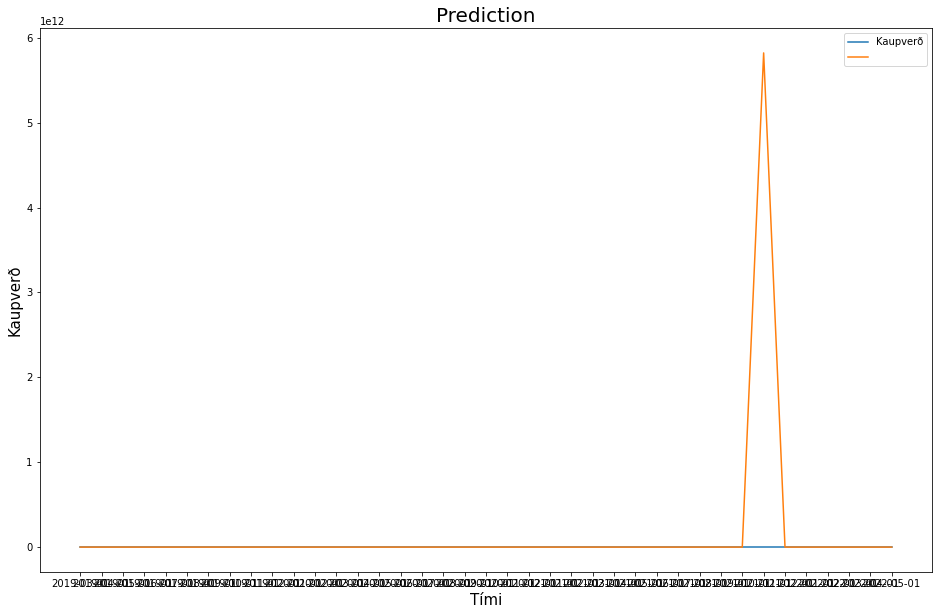

In [25]:
plt.figure(figsize=(16,10))
sns.lineplot(x='date', y='verd_m2', data=combined)
sns.lineplot(x='date', y='predicted price', data=combined)
plt.title('Prediction', fontsize='20')
plt.xlabel('Tími', fontsize='15')
plt.ylabel('Kaupverð', fontsize='15')
plt.legend(['Kaupverð', 'Spá'])

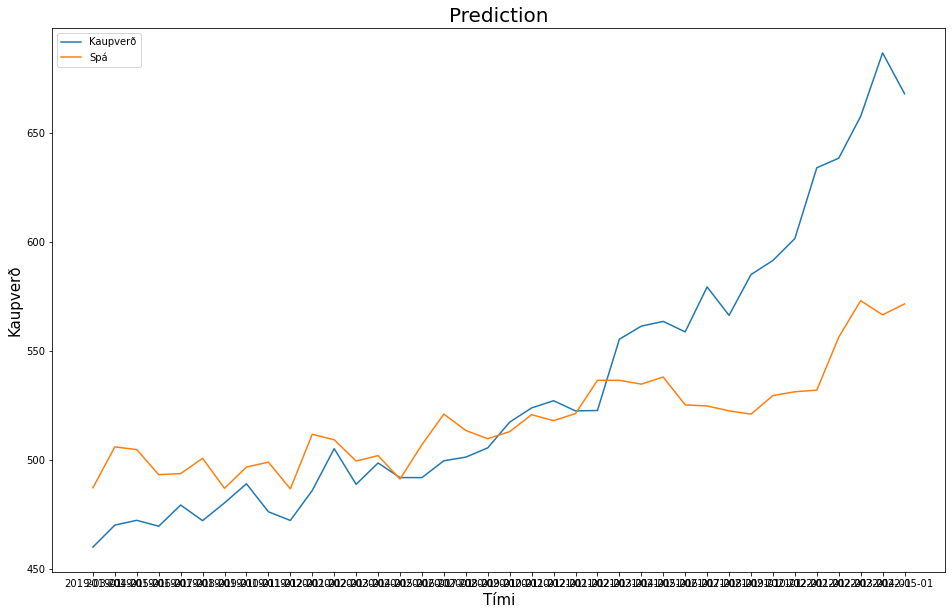

In [85]:
plt.figure(figsize=(16,10))
sns.lineplot(x='date', y='verd_m2', data=testt)
sns.lineplot(x='date', y='predicted price', data=testt)
plt.title('Prediction', fontsize='20')
plt.xlabel('Tími', fontsize='15')
plt.ylabel('Kaupverð', fontsize='15')
plt.legend(['Kaupverð', 'Spá'])

In [27]:
combined[['predicted price', 'verd_m2']]

,predicted price,verd_m2
date,,
2019-03-01,4.872500e+02,460.070533
2019-04-01,5.060000e+02,470.152123
2019-05-01,5.047500e+02,472.341138
2019-06-01,4.932500e+02,469.626683
2019-07-01,4.937500e+02,479.342097
2019-08-01,5.007500e+02,472.181376
2019-09-01,4.870000e+02,480.335639
2019-10-01,4.967500e+02,489.081488
2019-11-01,4.990000e+02,476.259142


In [83]:
testt = combined.drop(combined.iloc[32].name)

In [30]:
importance = regr.coef_
importance = pd.DataFrame(importance).T
importance.columns = X_test.columns
importance = importance.T
importance.head()

,0
fasteignamat,3.357061e+02
byggar,1.419335e+01
einflm,-1.003497e+02
lod_flm,-2.232641e+00
fullbuid,3.688228e+13


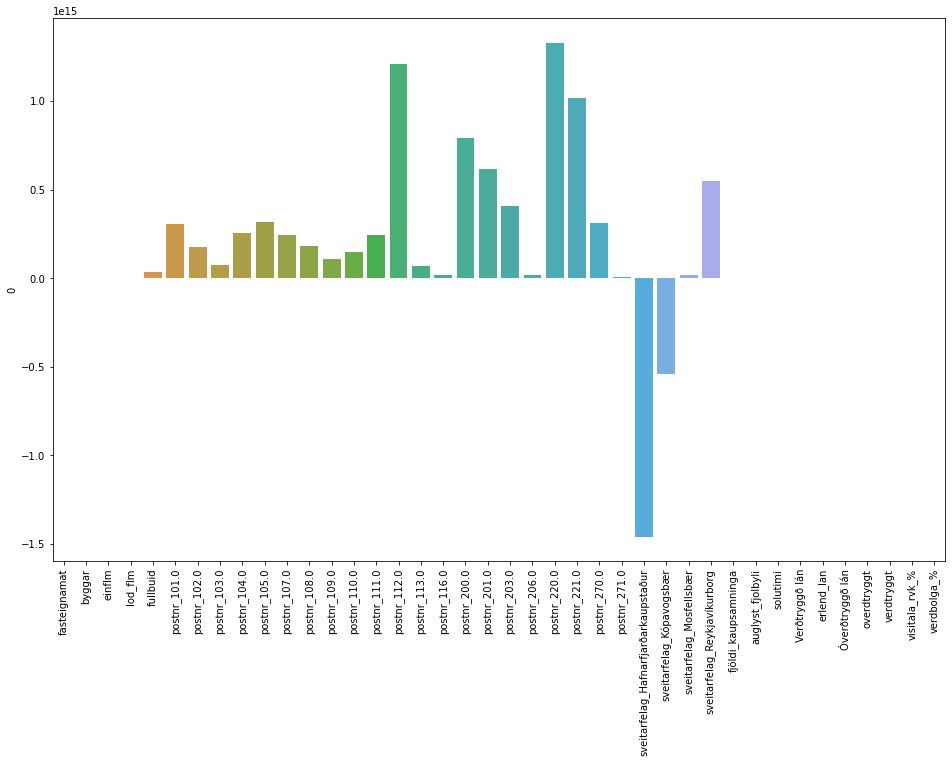

In [31]:
plt.figure(figsize=(16,10))
sns.barplot(x=importance.index, y=0, data=importance)
plt.xticks(rotation = 90)
plt.savefig('Coefficient Importance')

In [32]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [33]:
values = df.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.171592   0.160708   0.970797   1.000000   0.000000        0.0   
2   0.000000   0.000000   0.035030   0.229365   0.741363        0.0   
3   0.096270   0.061272   0.487589   0.577190   0.635171        0.0   
4   0.086243   0.056769   0.523130   0.506959   0.683110        0.0   
5   0.092335   0.069020   0.452336   0.515051   0.592577        0.0   

   var7(t-1)  var8(t-1)  var15(t-1)  var16(t-1)  ...  var33(t)  var34(t)  \
1   0.000000   0.000000    0.000000    0.000000  ...  0.573311  0.606250   
2   0.783333   0.000000    0.000000    1.000000  ...  0.411501  0.606250   
3   0.331921   0.000000    0.575263    0.237288  ...  0.371369  0.606250   
4   0.487482   0.029757    0.208097    0.171674  ...  0.337674  0.606250   
5   0.385246   0.000000    0.099358    0.327869  ...  0.279135  0.609375   

   var35(t)  var36(t)  var37(t)  var38(t)  var39(t)  var40(t)  var41(t)  \
1  0.202390  0.896151  0.334711  0.049309

In [62]:
# split into train and test sets
values = reframed.values

n_train_time = 12*2
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(24, 1, 77) (24,) (169, 1, 77) (169,)


array([[8.28971883e-01, 9.87348230e-01, 9.27616894e-04, 8.58757062e-01,
        1.00000000e+00, 5.81081081e-01],
       [8.40680047e-01, 9.74696460e-01, 8.11664782e-04, 8.58757062e-01,
        1.00000000e+00, 5.00000000e-01],
       [8.52388211e-01, 9.62044689e-01, 6.95712671e-04, 8.58757062e-01,
        1.00000000e+00, 6.21621622e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 4.80225989e-02,
        2.07900208e-03, 9.32432432e-01],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 4.80225989e-02,
        0.00000000e+00, 8.78378378e-01],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 7.62711864e-02,
        0.00000000e+00, 8.78378378e-01]])

In [63]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')



# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/20
1/1 - 2s - loss: 0.1218 - val_loss: 0.0342 - 2s/epoch - 2s/step
Epoch 2/20
1/1 - 0s - loss: 0.0675 - val_loss: 0.0149 - 32ms/epoch - 32ms/step
Epoch 3/20
1/1 - 0s - loss: 0.0434 - val_loss: 0.0132 - 33ms/epoch - 33ms/step
Epoch 4/20
1/1 - 0s - loss: 0.0367 - val_loss: 0.0211 - 26ms/epoch - 26ms/step
Epoch 5/20
1/1 - 0s - loss: 0.0443 - val_loss: 0.0294 - 33ms/epoch - 33ms/step
Epoch 6/20
1/1 - 0s - loss: 0.0517 - val_loss: 0.0322 - 45ms/epoch - 45ms/step
Epoch 7/20
1/1 - 0s - loss: 0.0487 - val_loss: 0.0300 - 39ms/epoch - 39ms/step
Epoch 8/20
1/1 - 0s - loss: 0.0459 - val_loss: 0.0250 - 47ms/epoch - 47ms/step
Epoch 9/20
1/1 - 0s - loss: 0.0473 - val_loss: 0.0191 - 49ms/epoch - 49ms/step
Epoch 10/20
1/1 - 0s - loss: 0.0378 - val_loss: 0.0146 - 59ms/epoch - 59ms/step
Epoch 11/20
1/1 - 0s - loss: 0.0343 - val_loss: 0.0121 - 68ms/epoch - 68ms/step
Epoch 12/20
1/1 - 0s - loss: 0.0370 - val_loss: 0.0116 - 51ms/epoch - 51ms/step
Epoch 13/20
1/1 - 0s - loss: 0.0312 - val_loss: 0.012

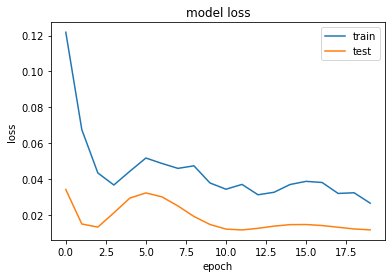

InvalidArgumentError: Graph execution error:

transpose expects a vector of size 2. But input(1) is a vector of size 3
	 [[{{node transpose}}]]
	 [[sequential_1/lstm_1/PartitionedCall]] [Op:__inference_predict_function_8519]

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 77))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -76:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -76:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [69]:
aa=[x for x in range(200)]
plt.plot(aa, inv_y[:200], marker='.', label="actual")
plt.plot(aa, inv_yhat[:200], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

NameError: name 'inv_y' is not defined